<a href="https://colab.research.google.com/github/minakovas/scRNAseq_project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сингулярности - non-manifold structures  
Euclidicity score for assessing the ‘manifoldness’ of a point along multiple scales.  
Our approach is based on a novel formulation of persistent local homology (PLH), a method for assessing the shape of neighbourhoods at multiple scales
of locality. We use PLH to (i) estimate the intrinsic dimension of a point locally, and (ii) define Euclidicity, a novel quantity that measures the deviation of a point from being Euclidean.  
  
If there exists a neighbourhood $U$ of $x$ that is homeomorphic to $\mathbb{R}^n$, we say that x is a regular point, otherwise
we call x a singularity.  
  
TARDIS is based on the assumption that the intrinsic dimension of data may not be constant across the data set, and is thus best described by local measurements, i.e. measurements in a small neighbourhood of a given point  
  
Knowledge about the intrinsic dimension of a neighbourhood is crucial for measuring to what extent such a neighbourhood deviates from being Euclidean. We refer to this deviation as **Euclidicity, with the understanding that low
values indicate Euclidean neighbourhoods while high values indicate singular regions of a data set**


# Установка необходимых пакетов

In [12]:
!git clone https://github.com/aidos-lab/TARDIS

Cloning into 'TARDIS'...
remote: Enumerating objects: 684, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 684 (delta 58), reused 57 (delta 57), pack-reused 620
Receiving objects: 100% (684/684), 6.43 MiB | 24.47 MiB/s, done.
Resolving deltas: 100% (427/427), done.


In [14]:
%%shell
cd TARDIS
pip install .
cd

Processing /content/TARDIS
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached colorlog-6.8.0-py3-none-any.whl (11 kB)
  Using cached furo-2023.9.10-py3-none-any.whl (324 kB)
  Using cached giotto_ph-0.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (526 kB)
  Using cached gudhi-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Using cached phate-1.0.11-py3-none-any.whl (23 kB)
  Using cached POT-0.8.2-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (671 kB)
  Using cached sphinx-7.2.6-py3-none-any.whl (3.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 987.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 1.9 MB/s eta 0:00:00
     ━━━━

In [16]:
!pip install scanpy[leiden] scrublet

Тут я скачиваю датасет, перевожу его из `.tab` в `.h5ad` и заливаю на гугл-диск.

In [ ]:
# !wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE104nnn/GSE104323/suppl/GSE104323%5F10X%5Fexpression%5Fdata%5FV2.tab.gz
# !wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE104nnn/GSE104323/suppl/GSE104323%5Fmetadata%5Fbarcodes%5F24185cells.txt.gz

# !gunzip GSE104323_10X_expression_data_V2.tab.gz
# !gunzip GSE104323_metadata_barcodes_24185cells.txt.gz

# import scanpy as sc
# adata = sc.read_text("GSE104323_10X_expression_data_V2.tab")
# adata = adata.transpose()
# adata.write_h5ad("GSE104323_10X_expression_data_V2.h5ad")

# from google.colab import drive
# drive.mount('/content/drive')

# !cp GSE104323_10X_expression_data_V2.h5ad /content/drive/MyDrive/"Colab Notebooks"/Transcriptomics_FBB/2023/GSE104323_10X_expression_data_V2.h5ad
# !cp GSE104323_metadata_barcodes_24185cells.txt /content/drive/MyDrive/"Colab Notebooks"/Transcriptomics_FBB/2023/GSE104323_metadata_barcodes_24185cells.txt


In [18]:
!gdown 1--mowd8QFA6eT-LBSkNNofSrSgfHEPgw
!gdown 1L7u-lXiOXtr--15L3EfvgfiLRvTPLJP8

Downloading...
From: https://drive.google.com/uc?id=1--mowd8QFA6eT-LBSkNNofSrSgfHEPgw
To: /content/GSE104323_10X_expression_data_V2.h5ad
100% 2.70G/2.70G [00:30<00:00, 90.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1L7u-lXiOXtr--15L3EfvgfiLRvTPLJP8
To: /content/GSE104323_metadata_barcodes_24185cells.txt
100% 3.80M/3.80M [00:00<00:00, 151MB/s]


In [20]:
import scanpy as sc
import scanpy.external as sce
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [177]:
adata = sc.read_h5ad("GSE104323_10X_expression_data_V2.h5ad")
adata.X = sp.sparse.csr_matrix(adata.X)

In [178]:
adata

AnnData object with n_obs × n_vars = 24185 × 27933

Сохраню порядок баркодов, чтобы потом после мержа вернуть его

In [179]:
adata_obs_order = list(adata.obs.index)

Посмотрим, что есть в метадате

In [180]:
metadata = pd.read_csv("GSE104323_metadata_barcodes_24185cells.txt", sep="\t")
metadata.head()

,Sample name (24185 single cells),source name,organism,characteristics: strain,characteristics: age,characteristics: sex of pooled animals,characteristics: cell cluster,molecule,SRR run accession,raw file (original file name),UMI_CellularBarcode
0,10X79_1_AAACTAGCTAGCCC-,dentate gyrus,Mus musculus,hGFAP-GFP,P120,2males+1female,Neuroblast,total RNA,SRR6089817,10X79_1_AAACTAGCTAGCCC.fq.gz,CGGCGATCCC_AAACTAGCTAGCCC
1,10X79_1_AAACTAGGATGTAT-,dentate gyrus,Mus musculus,hGFAP-GFP,P120,2males+1female,OPC,total RNA,SRR6089947,10X79_1_AAACTAGGATGTAT.fq.gz,AGTGGTAATG_AAACTAGGATGTAT
2,10X79_1_AAACTCACGGCGTT-,dentate gyrus,Mus musculus,hGFAP-GFP,P120,2males+1female,GC-adult,total RNA,SRR6089529,10X79_1_AAACTCACGGCGTT.fq.gz,GGGTGCGCTC_AAACTCACGGCGTT
3,10X79_1_AAACTGTCGGCTCA-,dentate gyrus,Mus musculus,hGFAP-GFP,P120,2males+1female,MOL,total RNA,SRR6089595,10X79_1_AAACTGTCGGCTCA.fq.gz,CCTTTCAACG_AAACTGTCGGCTCA
4,10X79_1_AAACTGTGATAAGT-,dentate gyrus,Mus musculus,hGFAP-GFP,P120,2males+1female,OPC,total RNA,SRR6090058,10X79_1_AAACTGTGATAAGT.fq.gz,CCTTTCAGGT_AAACTGTGATAAGT


Выкинем пустые ячейки

In [181]:
metadata[metadata["Sample name (24185 single cells)"].isna()].head()

,Sample name (24185 single cells),source name,organism,characteristics: strain,characteristics: age,characteristics: sex of pooled animals,characteristics: cell cluster,molecule,SRR run accession,raw file (original file name),UMI_CellularBarcode
24185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
metadata = metadata[~metadata.isna().any(axis=1)]

Посмотрим уникальные значения в колонках:

In [183]:
metadata.apply(pd.Series.nunique)

Sample name (24185 single cells)          24185
source name                                   1
organism                                      1
characteristics: strain                       3
characteristics: age                          8
characteristics: sex of pooled animals        5
characteristics: cell cluster                24
molecule                                      1
SRR run accession                         24185
raw file (original file name)             24185
UMI_CellularBarcode                       24185
dtype: int64

In [184]:
metadata[[
    "source name",
    "organism",
    "characteristics: strain",
    "characteristics: age",
    "characteristics: sex of pooled animals",
    "characteristics: cell cluster",
    "molecule"
]].apply(pd.Series.unique)

source name                                                                 [dentate gyrus]
organism                                                                     [Mus musculus]
characteristics: strain                                          [hGFAP-GFP, C57Bl/6, CD-1]
characteristics: age                             [P120, P19, P132, E16.5, P0, P18, P5, P23]
characteristics: sex of pooled animals    ales+1female, female, 3male+1female, unknow...
characteristics: cell cluster             [Neuroblast, OPC, GC-adult, MOL, RGL, Ependyma...
molecule                                                                        [total RNA]
dtype: object

Посмотрим, как связаны линия мышей и возраст клеток

In [185]:
pd.crosstab(metadata["characteristics: age"],
            metadata["characteristics: strain"])

characteristics: strain,C57Bl/6,CD-1,hGFAP-GFP
characteristics: age,,,
E16.5,0,2285,0
P0,0,4779,0
P120,0,0,1363
P132,0,0,3829
P18,0,2712,0
P19,2081,0,0
P23,0,2701,0
P5,0,4435,0


Видим, что C57Bl/6 и hGFAP-GFP есть только на конкретных стадиях, причем поздних  
На ранних только CD-1.

Добавим `strain`, `age`, `sex` и `cell_cluster` в `adata.obs`:

In [186]:
adata.obs = adata.obs.merge(
    metadata.rename(columns={
        "Sample name (24185 single cells)": "barcode",
        "characteristics: strain": "strain",
        "characteristics: age": "age",
        "characteristics: sex of pooled animals": "sex",
        "characteristics: cell cluster": "cell_cluster_metadata",
    }) \
    .set_index("barcode") \
     [["strain", "age", "sex", "cell_cluster_metadata"]],
    left_index=True,
    right_index=True,
    how="left"
)

In [187]:
adata.obs.head()

,strain,age,sex,cell_cluster_metadata
10X79_1_TCTACCATGCCTAA-,hGFAP-GFP,P120,2males+1female,RGL
10X79_2_GTACTAGTGAACAT-,C57Bl/6,P19,female,RGL
10X79_2_AATCAGTACCTACA-,C57Bl/6,P19,female,RGL
10X79_1_CGGGTTCTTGAGGT-,hGFAP-GFP,P120,2males+1female,RGL
10X79_1_GTGGAAGGCGTACA-,hGFAP-GFP,P120,2males+1female,RGL


In [188]:
adata.obs.isna().any()

strain                   False
age                      False
sex                      False
cell_cluster_metadata    False
dtype: bool

Все нормально добавилось

Проверю, сохранился ли порядок клеток:

In [189]:
list(adata.obs.index) == adata_obs_order

True

Так как Tardis считается очень долго, я оставлю только клетки возраста P0 и P5, как делали в статье RNA velocity of single cells

In [190]:
adata = adata[adata.obs.age.isin(("P0", "P5")), :].copy()

In [191]:
adata

AnnData object with n_obs × n_vars = 9214 × 27933
    obs: 'strain', 'age', 'sex', 'cell_cluster_metadata'

# QC

In [192]:
adata.X.min(), adata.X.max()

(0.0, 3841.0)

У нас сырые каунты

### Пустые капли и распределение митохондриальных каунтов:

In [193]:
adata.var["mt"] = adata.var.index.str.startswith("mt-")

In [194]:
adata.var

,mt
0610007P14Rik,False
0610009B22Rik,False
0610009L18Rik,False
0610009O20Rik,False
0610010F05Rik,False
...,...
mt-Nd3,True
mt-Nd4,True
mt-Nd4l,True
mt-Nd5,True


In [195]:
adata.obs.head()

,strain,age,sex,cell_cluster_metadata
10X84_3_GGCAGGTACTTGAC-,CD-1,P5,unknown,Immature-Astro
10X83_3_CTTCGCATTATCTC-,CD-1,P0,unknown,Immature-Astro
10X84_2_ATTCTAGTCACGCC-,CD-1,P5,unknown,Immature-Astro
10X83_2_GCTGGAGTTAACGA-,CD-1,P0,unknown,Immature-Astro
10X84_3_AGGATAGAGTGAGA-,CD-1,P5,unknown,Immature-Astro


In [196]:
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt"], # колонки из adata.var
    percent_top=None,
    inplace=True,
    log1p=False
)

In [197]:
adata.obs.head()

,strain,age,sex,cell_cluster_metadata,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
10X84_3_GGCAGGTACTTGAC-,CD-1,P5,unknown,Immature-Astro,1726,3587.0,347.0,9.673822
10X83_3_CTTCGCATTATCTC-,CD-1,P0,unknown,Immature-Astro,2011,5378.0,291.0,5.410933
10X84_2_ATTCTAGTCACGCC-,CD-1,P5,unknown,Immature-Astro,1794,3664.0,223.0,6.086245
10X83_2_GCTGGAGTTAACGA-,CD-1,P0,unknown,Immature-Astro,1827,3544.0,123.0,3.470655
10X84_3_AGGATAGAGTGAGA-,CD-1,P5,unknown,Immature-Astro,2278,4817.0,148.0,3.072452


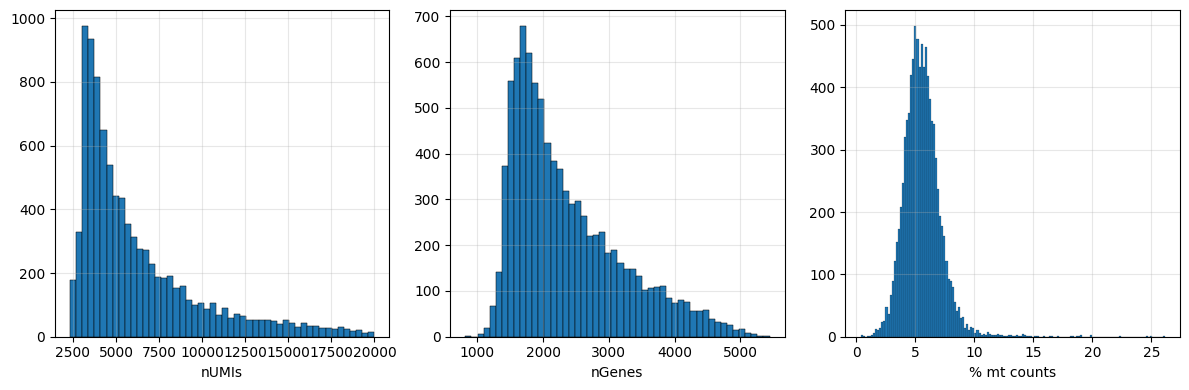

In [198]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

sns.histplot(adata.obs.total_counts, log_scale=False, alpha=1, bins=50, edgecolor="black", ax=axes[0])
axes[0].set_ylabel("")
axes[0].set_xlabel("nUMIs")
axes[0].grid(alpha=0.3)

sns.histplot(adata.obs.n_genes_by_counts, log_scale=False, alpha=1, bins=50, edgecolor="black", ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_xlabel("nGenes")
axes[1].grid(alpha=0.3)

sns.histplot(adata.obs.pct_counts_mt, alpha=1, edgecolor="black", ax=axes[2])
axes[2].set_ylabel("")
axes[2].set_xlabel("% mt counts")
axes[2].grid(alpha=0.3)

fig.tight_layout()

Левый и средний графики выглядят в целом адекватно, как будто они уже обрезаны


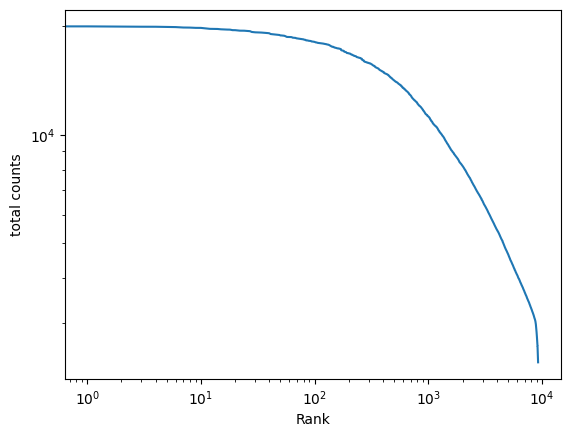

In [199]:
fig, ax = plt.subplots()
ax.plot(sorted(adata.obs.total_counts, reverse=True));
ax.set(xscale="log",
       yscale="log",
       xlabel="Rank",
       ylabel="total counts");

In [200]:
adata.obs.total_counts.min()

2332.0

Ну да, пустых капель нет

В распределении митохондриальных каунтов длинный хвост вправо - это подозрительно  
Посмотрим, может это какой-то определенный тип клеток:

In [201]:
from collections import Counter

print(Counter(adata.obs[adata.obs.pct_counts_mt > 10].cell_cluster_metadata))

Counter({'Immature-Pyr': 47, 'Immature-GABA': 22, 'Immature-Astro': 13, 'Immature-GC': 5, 'MiCajal-Retziusoglia': 4, 'RGL_young': 3, 'GABA': 3, 'Neuroblast': 2, 'Ependymal': 1, 'VLMC': 1, 'nIPC-perin': 1})


Какого-то определенного типа клеток с повышенной митохондриальной экспрессией нет ==> скорее всего они просто поврежденные  
Выкину те, у которых `pct_counts_mt > 15`, их довольно мало:

In [202]:
sum(adata.obs.pct_counts_mt > 15)

18

In [203]:
adata = adata[adata.obs.pct_counts_mt <= 15, :].copy()

In [204]:
adata

AnnData object with n_obs × n_vars = 9196 × 27933
    obs: 'strain', 'age', 'sex', 'cell_cluster_metadata', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### Определение дублетов - Scrublet:

In [205]:
sce.pp.scrublet(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.61
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 9.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


In [206]:
print(adata.obs.predicted_doublet.sum())
print(adata.obs.predicted_doublet.sum() / len(adata.obs))

9
0.00097868638538495


Предсказано 9 дублетов, пока оставим их

# Распределения и контроль за дисперсией

Посмотрим на распределение какого-нибудь хорошо представленного гена:

In [207]:
adata.var.sort_values(by="total_counts", ascending=False).head(2)

,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
Malat1,False,9089,93.111458,1.356631,857929.0
mt-Atp6,True,9214,83.269913,0.000000,767249.0


<Axes: ylabel='Count'>

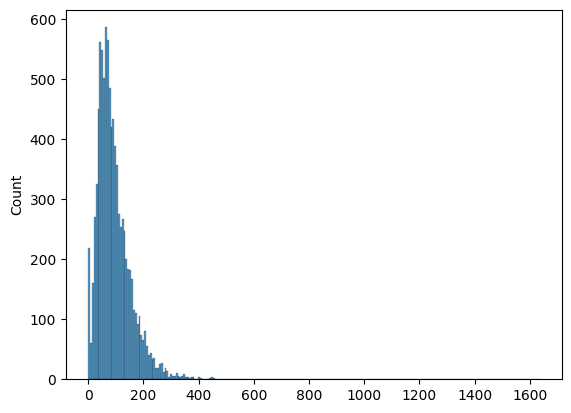

In [208]:
malat1_expr = adata[:, "Malat1"].X.A.T[0]
sns.histplot(malat1_expr)

Ожидаемо, длинный хвост, похоже на NB

Посмотрим на график среднего против дисперсии:

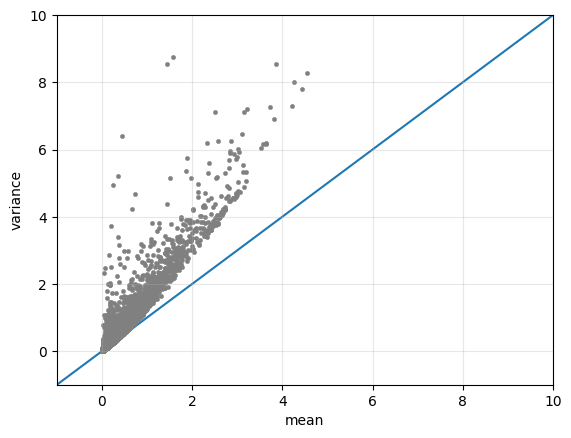

In [209]:
mean = adata.X.mean(axis=0).A[0]
variance = np.var(adata.X.A, axis=0)

ax = sns.scatterplot(
    x=np.log(mean + 1),
    y=np.log(variance + 1),
    edgecolor=None,
    color="grey",
    s=10,
)
ax.plot([-10, 20], [-10, 20], zorder=-2)

ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)
ax.set(xlabel="mean",
       ylabel="variance")
ax.grid(alpha=0.3)

Овердисперсия - опять же ожидаемо

### Нормализация и логарифмирование

Сохраняем матрицу с каунтами, мало ли потом пригодится

In [210]:
adata_counts = adata.copy()

In [211]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [212]:
adata.X.max()

8.202973

<Axes: >

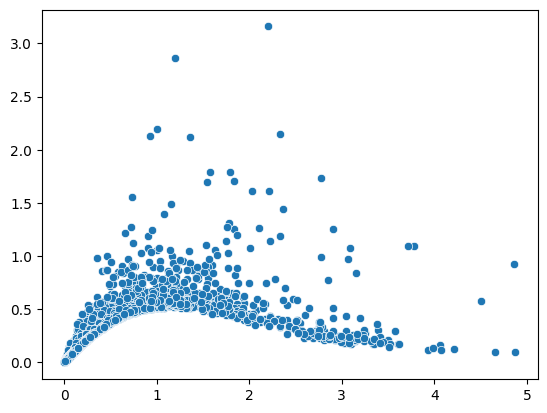

In [215]:
variances = np.var(adata.X.A, axis=0)
means = np.mean(adata.X.A, axis=0)

sns.scatterplot(x=means, y=variances)

Связь среднего и дисперсии все ещё остается

# Выделение высоковариабельных генов

In [216]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000)

In [64]:
adata.var.head()

,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
0610007P14Rik,False,5260,1.099088,42.912959,10127.0,False,0.990492,0.876689,-0.206790
0610009B22Rik,False,3131,0.454309,66.019101,4186.0,False,0.546349,0.738441,-0.463910
0610009L18Rik,False,1176,0.143152,87.236814,1319.0,False,0.206876,0.729897,-0.003101
0610009O20Rik,False,956,0.111786,89.624484,1030.0,False,0.179338,0.769004,0.105179
0610010F05Rik,False,3377,0.580421,63.349251,5348.0,False,0.603952,0.772322,-0.354341


In [65]:
adata_hvg = adata.copy()

adata_hvg.raw = adata_hvg
adata_hvg = adata_hvg[:, adata_hvg.var.highly_variable]

# PCA

In [217]:
adata.obsm["X_pca"] = sc.pp.pca(
    sc.pp.scale(
        adata[:, adata.var.highly_variable].X,
        max_value=10),
    n_comps=30
  )

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


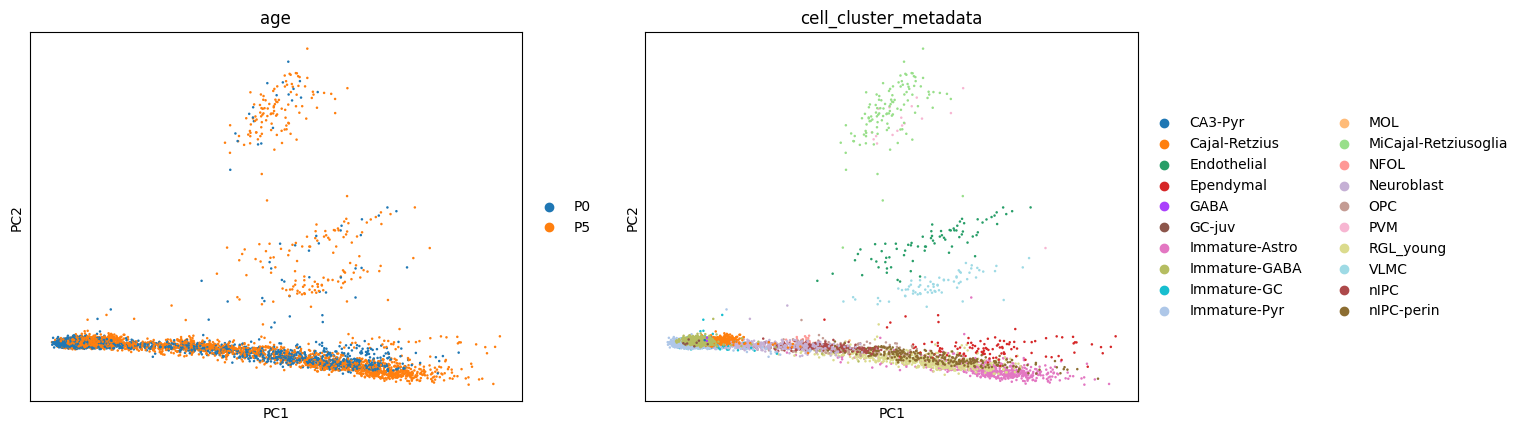

In [67]:
sc.pl.pca(adata, color=["age", "cell_cluster_metadata"]);

In [219]:
sc.pp.pca(adata_hvg)

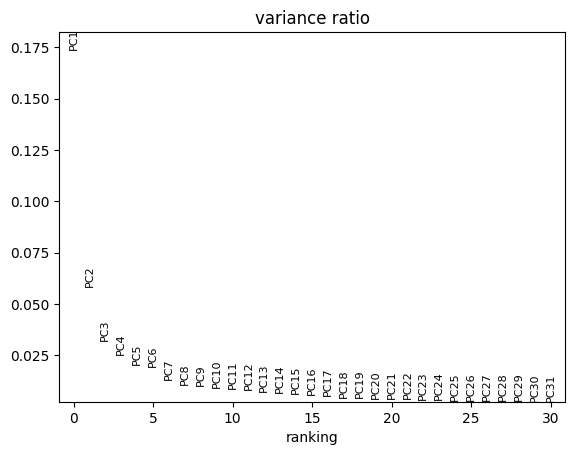

In [220]:
sc.pl.pca_variance_ratio(adata_hvg)

### kNN-граф, UMAP, кластеризация

In [221]:
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=20)

In [222]:
sc.tl.umap(adata)
sc.tl.leiden(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


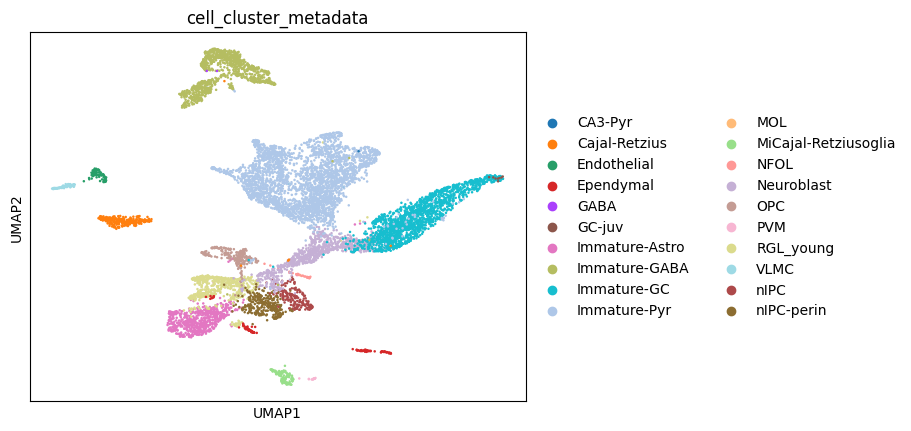

In [223]:
sc.pl.umap(adata, color=["cell_cluster_metadata"])

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


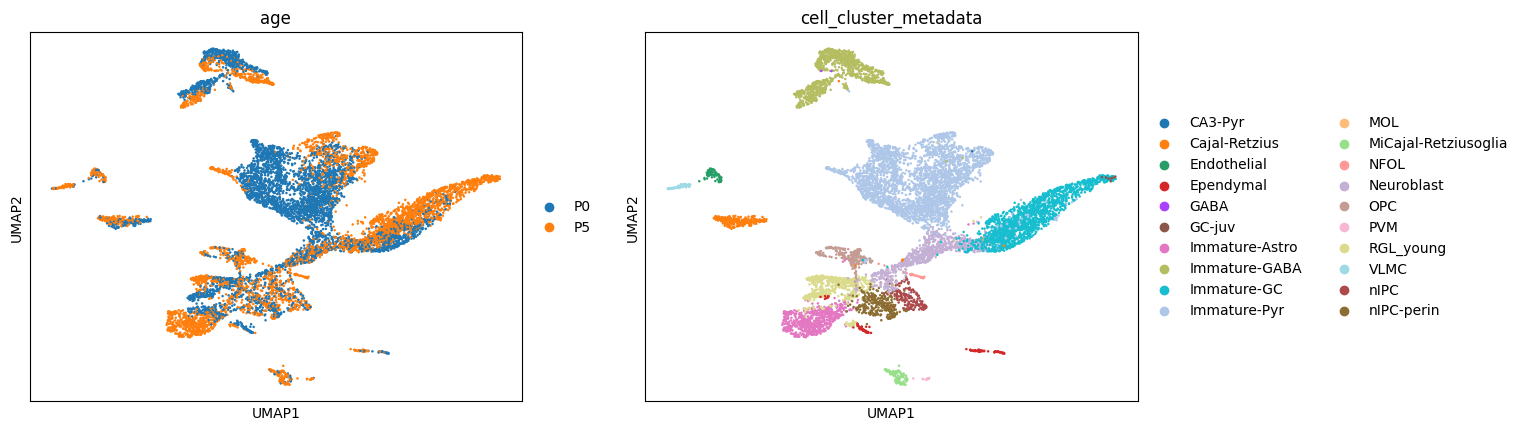

In [82]:
sc.pl.umap(adata, color=["age", "cell_cluster_metadata"])

# Детекция топологических сингулярностей

In [83]:
from tardis import calculate_euclidicity

In [85]:
calculate_euclidicity

<function tardis.api.calculate_euclidicity(X, Y=None, max_dim=2, n_steps=10, r=None, R=None, s=None, S=None, k=20, n_jobs=1, return_dimensions=False)>

In [86]:
print(calculate_euclidicity.__doc__)

Convenience function for calculating Euclidicity of a point cloud.

    This function provides the most convenient interface for calculating
    Euclidicity of a point cloud. Internally, this function will use the
    best and fastest Euclidicity calculation, but this comes at the cost
    of configurability.

    TODO: Document me :-)
    


В статье обычно считают на исходных данных, а не на эмбеддингах и n_steps по дефолту 20, но на моих данных оно считается очень долго, поэтому я посчитаю на `X_pca` с `n_steps` от 1 до 5, на highly_variable_genes и на полном датасете с `n_steps=1`

### Расчет euclidicity и внутренней размерности

X_pca 1 to 5 steps:

In [104]:
%%time
euclidicity_xpca_1step, dimensions_xpca_1step = calculate_euclidicity(
    adata.obsm["X_pca"], k=50, max_dim=30, n_steps=1, return_dimensions=True,
)

adata.obs["euclidicity_xpca_1step"] = pd.Series(data=euclidicity_xpca_1step,
                                                index=adata.obs.index)

adata.obs["dimensions_xpca_1step"] = pd.Series(data=dimensions_xpca_1step,
                                                index=adata.obs.index)

CPU times: user 12 s, sys: 686 ms, total: 12.7 s
Wall time: 38.8 s


In [102]:
%%time
euclidicity_xpca_2step, dimensions_xpca_2step = calculate_euclidicity(
    adata.obsm["X_pca"], k=50, max_dim=30, n_steps=2, return_dimensions=True
)

adata.obs["euclidicity_xpca_2step"] = pd.Series(data=euclidicity_xpca_2step,
                                                index=adata.obs.index)

adata.obs["dimensions_xpca_2step"] = pd.Series(data=dimensions_xpca_2step,
                                                index=adata.obs.index)

CPU times: user 3min 22s, sys: 19.9 s, total: 3min 42s
Wall time: 3min 53s


In [105]:
%%time
euclidicity_xpca_3step, dimensions_xpca_3step = calculate_euclidicity(
    adata.obsm["X_pca"], k=50, max_dim=30, n_steps=3, return_dimensions=True
)

adata.obs["euclidicity_xpca_3step"] = pd.Series(data=euclidicity_xpca_3step,
                                                index=adata.obs.index)

adata.obs["dimensions_xpca_3step"] = pd.Series(data=dimensions_xpca_3step,
                                                index=adata.obs.index)

CPU times: user 9min 45s, sys: 45.3 s, total: 10min 31s
Wall time: 10min 59s


In [106]:
%%time
euclidicity_xpca_4step, dimensions_xpca_4step = calculate_euclidicity(
    adata.obsm["X_pca"], k=50, max_dim=30, n_steps=4, return_dimensions=True
)

adata.obs["euclidicity_xpca_4step"] = pd.Series(data=euclidicity_xpca_4step,
                                                index=adata.obs.index)

adata.obs["dimensions_xpca_4step"] = pd.Series(data=dimensions_xpca_4step,
                                                index=adata.obs.index)

CPU times: user 18min 25s, sys: 1min 21s, total: 19min 47s
Wall time: 20min 32s


In [107]:
%%time
euclidicity_xpca_5step, dimensions_xpca_5step = calculate_euclidicity(
    adata.obsm["X_pca"], k=50, max_dim=30, n_steps=5, return_dimensions=True
)

adata.obs["euclidicity_xpca_5step"] = pd.Series(data=euclidicity_xpca_5step,
                                                index=adata.obs.index)

adata.obs["dimensions_xpca_5step"] = pd.Series(data=dimensions_xpca_5step,
                                                index=adata.obs.index)

CPU times: user 30min 21s, sys: 2min 10s, total: 32min 32s
Wall time: 33min 35s


In [109]:
adata.obs.to_csv("adata_obs_euclidicity_Xpca_1_to_5_steps.csv")

highly_variable 1 and 2 steps:

In [123]:
%%time
euclidicity_hvg_1step, dimensions_hvg_1step = calculate_euclidicity(
    adata[:, adata.var.highly_variable].X.A, k=50, max_dim=30, n_steps=1, return_dimensions=True
)

adata.obs["euclidicity_hvg_1step"] = pd.Series(data=euclidicity_hvg_1step,
                                                index=adata.obs.index)

adata.obs["dimensions_hvg_1step"] = pd.Series(data=dimensions_hvg_1step,
                                                index=adata.obs.index)


CPU times: user 27min 11s, sys: 13min 21s, total: 40min 33s
Wall time: 25min 35s


In [124]:
%%time
euclidicity_hvg_2step, dimensions_hvg_2step = calculate_euclidicity(
    adata[:, adata.var.highly_variable].X.A, k=50, max_dim=30, n_steps=2, return_dimensions=True
)

adata.obs["euclidicity_hvg_2step"] = pd.Series(data=euclidicity_hvg_2step,
                                                index=adata.obs.index)

adata.obs["dimensions_hvg_2step"] = pd.Series(data=dimensions_hvg_2step,
                                                index=adata.obs.index)


CPU times: user 1h 32min 37s, sys: 53min 22s, total: 2h 25min 59s
Wall time: 1h 25min 47s


In [125]:
adata.obs.to_csv("adata_obs_euclidicity_Xpca_1_to_5_steps_hvg_1_to_2_steps.csv")

Whole X 1 step:

In [129]:
%%time
euclidicity_X_1step, dimensions_X_1step = calculate_euclidicity(
    adata.X.A, k=50, max_dim=30, n_steps=1, return_dimensions=True
)

adata.obs["euclidicity_X_1step"] = pd.Series(data=euclidicity_X_1step,
                                                index=adata.obs.index)

adata.obs["dimensions_X_1step"] = pd.Series(data=dimensions_X_1step,
                                                index=adata.obs.index)


CPU times: user 3h 8min 54s, sys: 13min 29s, total: 3h 22min 23s
Wall time: 3h 7min 13s


In [130]:
adata.obs.to_csv("adata_obs_euclidicity_Xpca_1_to_5_steps_hvg_1_to_2_steps_X_1_step.csv")

### Анализ результатов

In [132]:
adata.obs.columns

Index(['strain', 'age', 'sex', 'cell_cluster_metadata', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score',
       'predicted_doublet', 'leiden', 'euclidicity_xpca_1step',
       'dimensions_xpca_1step', 'euclidicity_xpca_2step',
       'dimensions_xpca_2step', 'euclidicity_xpca_3step',
       'dimensions_xpca_3step', 'euclidicity_xpca_4step',
       'dimensions_xpca_4step', 'euclidicity_xpca_5step',
       'dimensions_xpca_5step', 'euclidicity_hvg_1step',
       'dimensions_hvg_1step', 'euclidicity_hvg_2step', 'dimensions_hvg_2step',
       'euclidicity_X_1step', 'dimensions_X_1step'],
      dtype='object')

Euclidicity и Intrinsic dimension на X_pca:

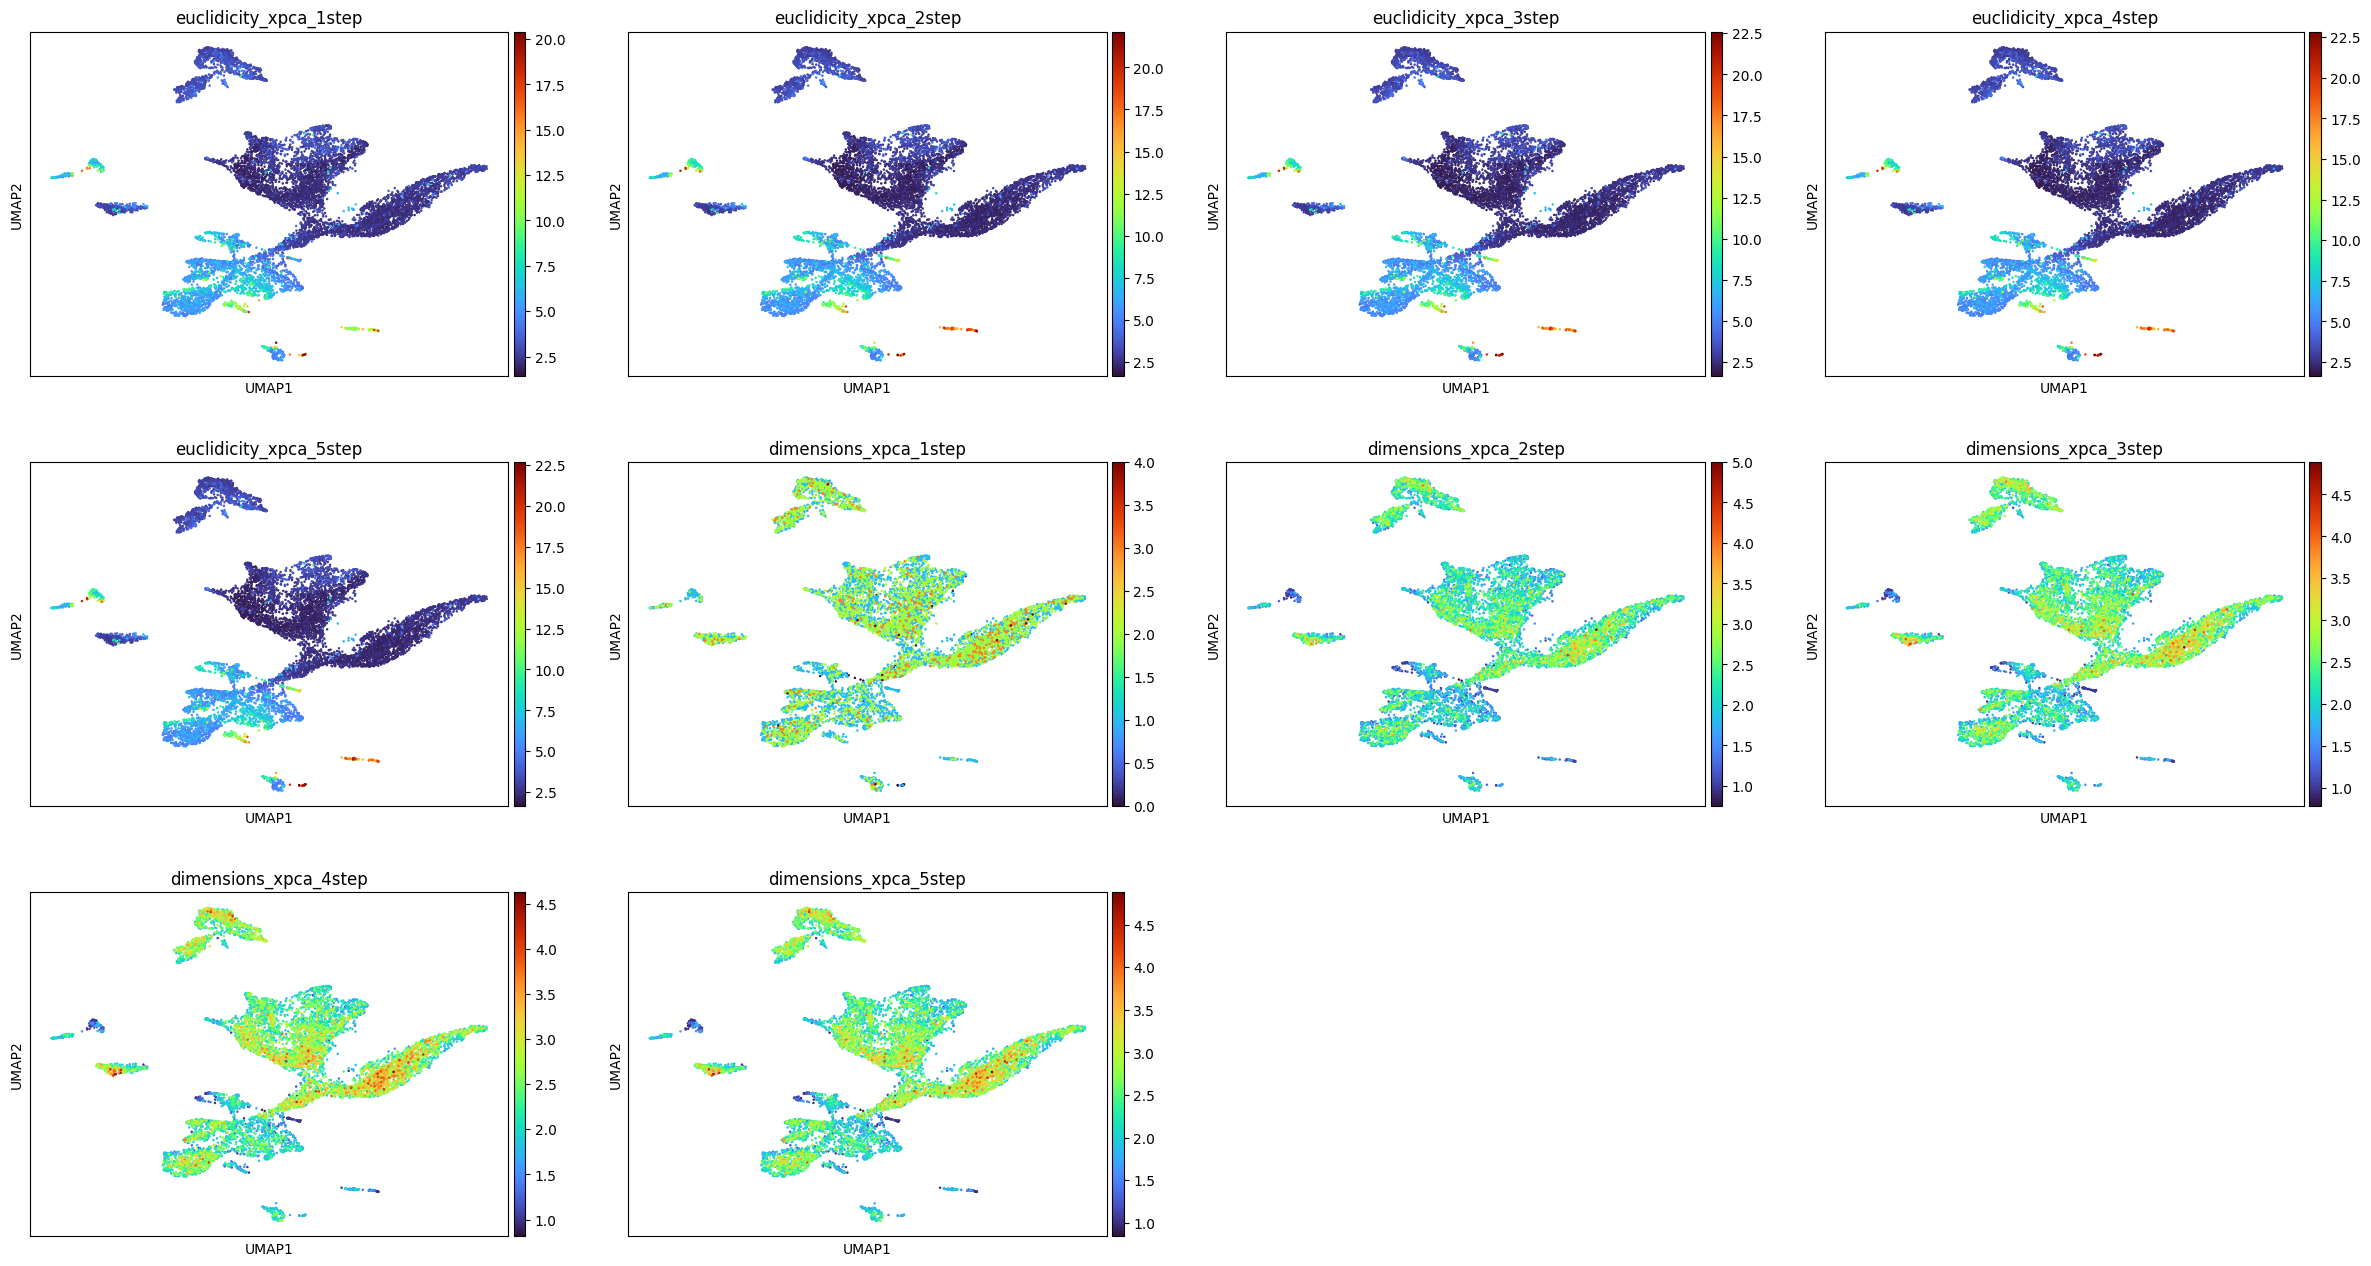

In [142]:
sc.pl.umap(adata, color=["euclidicity_xpca_1step",
                         "euclidicity_xpca_2step",
                         "euclidicity_xpca_3step",
                         "euclidicity_xpca_4step",
                         "euclidicity_xpca_5step",
                         "dimensions_xpca_1step",
                         "dimensions_xpca_2step",
                         "dimensions_xpca_3step",
                         "dimensions_xpca_4step",
                         "dimensions_xpca_5step",], color_map="turbo")

Видим, что с ростом n_steps euclidicity и intrinsic dimension особо не меняются

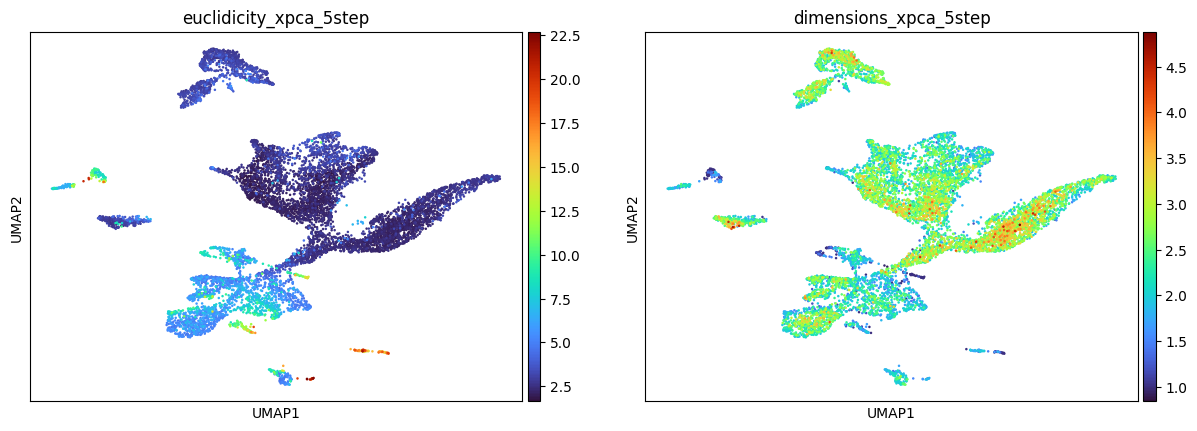

In [140]:
sc.pl.umap(adata, color=["euclidicity_xpca_5step",
                         "dimensions_xpca_5step"], color_map="turbo")

На высоковариабельных генах:

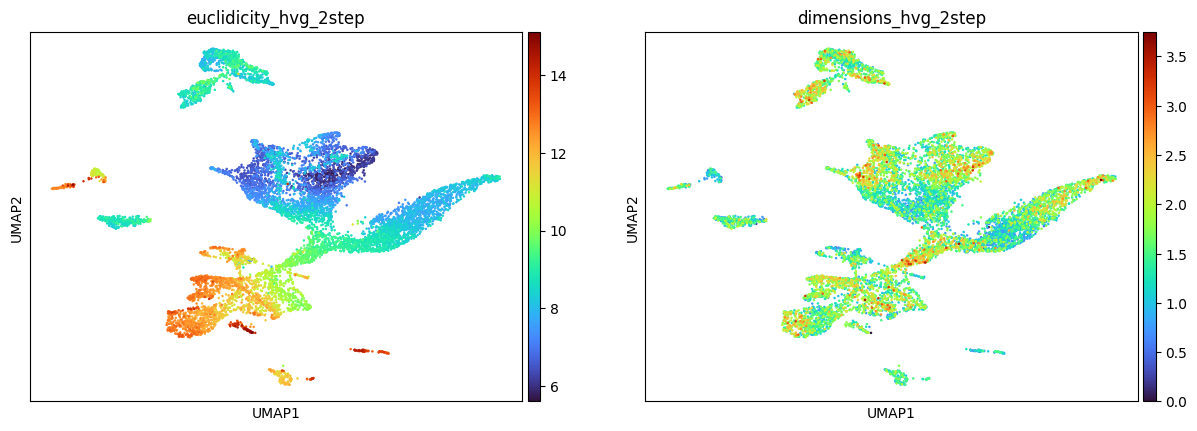

In [145]:
sc.pl.umap(adata, color=["euclidicity_hvg_2step",
                         "dimensions_hvg_2step"], color_map="turbo")

На целом датасете:

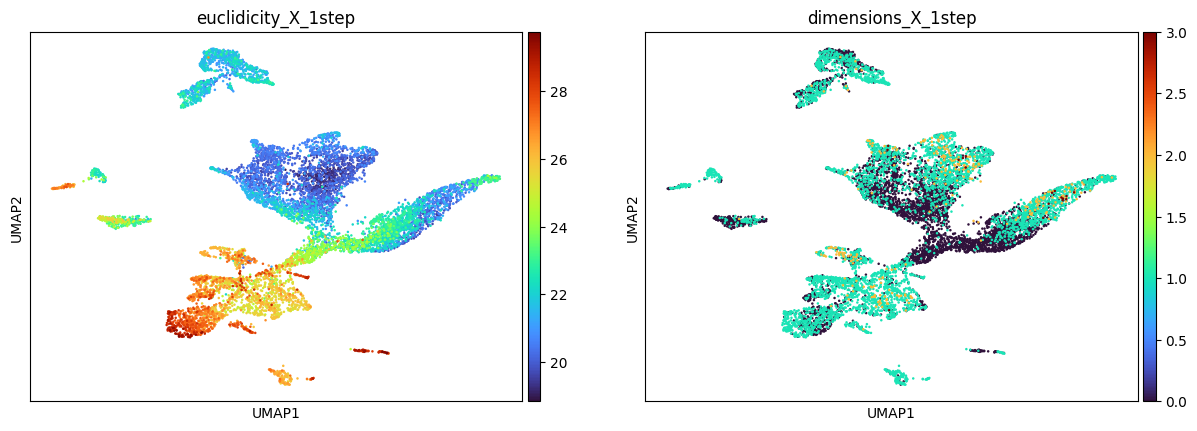

In [146]:
sc.pl.umap(adata, color=["euclidicity_X_1step",
                         "dimensions_X_1step"], color_map="turbo")

Видим, что в зависимости от используемого эмбеддинга значения euclidicity меняются значительно, но при этом относительное распределение остается примерно одним и тем же

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


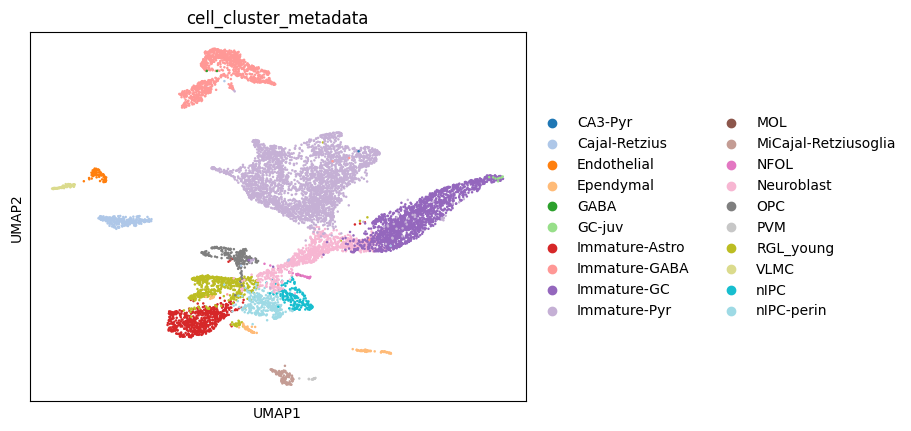

In [160]:
sc.pl.umap(adata, color="cell_cluster_metadata", palette="tab20")

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


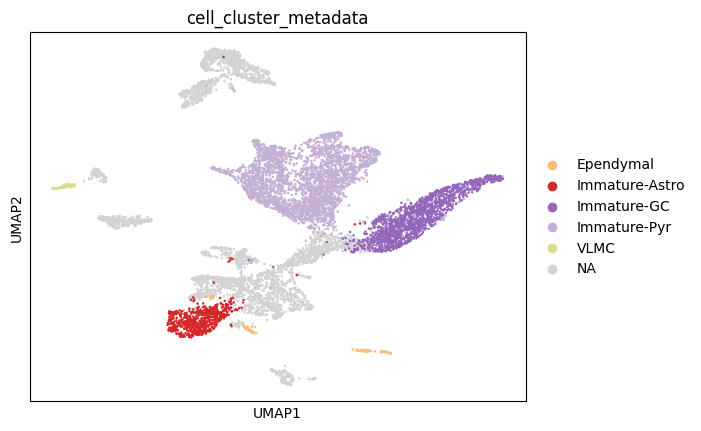

In [161]:
groups=["Immature-Pyr", "Immature-GC", "Ependymal", "VLMC", "Immature-Astro"]
sc.pl.umap(adata, color="cell_cluster_metadata", palette="tab20", groups=groups)

Самыми большими значениями euclidicity обладают кластеры, соответствующие VLMC и Ependymal  
  
Судя по статье, это либо топологические сингулярности, либо они обладают наиболее сложной структурой. Так как они лежат отдельно, я склоняюсь ко второму варианту

In [175]:
adata[adata.obs.cell_cluster_metadata == "VLMC"].obs.n_genes_by_counts.mean()

2213.5285714285715

In [174]:
adata.obs.groupby("cell_cluster_metadata").agg({"total_counts": "mean",
                                                "n_genes_by_counts": "mean",
                                                "total_counts_mt": "mean"})

,total_counts,n_genes_by_counts,total_counts_mt
cell_cluster_metadata,,,
CA3-Pyr,5145.000000,2368.000000,269.000000
Cajal-Retzius,6092.721191,2428.139373,310.891998
Endothelial,8728.315430,2720.657895,396.500000
Ependymal,6247.128418,2692.623932,352.068390
GABA,14659.000000,4386.000000,1547.000000
GC-juv,5801.625000,2577.375000,312.500000
Immature-Astro,4632.361816,2056.333333,254.471695
Immature-GABA,6966.404297,2582.648091,357.782257
Immature-GC,5207.594238,2148.045108,310.287048
